<a href="https://colab.research.google.com/github/goforswap/Covid-19-Forecast/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
import plotly.express as px
import plotly.graph_objects as go

# ***Importing Dataset***

In [ ]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_raw = pd.read_csv(url)

# ***Preprocessing for Future Prediction of Specific Country - 'India'***

In [ ]:
is_country = data_raw["Country/Region"] == "India"
data = data_raw[is_country]

In [ ]:
del data["Province/State"]
del data["Lat"]
del data["Long"]

In [ ]:
data.set_index("Country/Region", inplace = True)
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,1,1,...,43027035,43028131,43029044,43029839,43030925,43031958,43033067,43034217,43035271,43036132


In [ ]:
data_tillFeb22 = data.drop(data.loc[:, '3/1/22':].columns, axis = 1)
data_tillFeb22

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,1,1,...,42822473,42838524,42851929,42867031,42881179,42894345,42905844,42916117,42924130,42931045


In [ ]:
data_fromMarch22 = data.drop(data.loc[:, :'2/28/22'].columns, axis = 1)
data_fromMarch22

,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,42938599,42945160,42951556,42957477,42962953,42967315,42971308,42975883,42980067,42984261,...,43027035,43028131,43029044,43029839,43030925,43031958,43033067,43034217,43035271,43036132


In [ ]:
India_cases_tillFeb22 = data_tillFeb22.values.tolist()[0]

In [ ]:
India_cases_tillFeb22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [ ]:
India_cases_tillFeb22 = np.array(India_cases_tillFeb22)
India_cases_tillFeb22.shape

(769,)

In [ ]:
India_cases_tillFeb22 = India_cases_tillFeb22.reshape((India_cases_tillFeb22.shape[0], 1))
India_cases_tillFeb22.shape

(769, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
India_cases_tillFeb22_scaled = scaler.fit_transform(India_cases_tillFeb22)

In [ ]:
India_cases_tillFeb22_scaled

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.32931670e-08],
       [2.32931670e-08],
       [2.32931670e-08],
       [4.65863340e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],
       [6.98795010e-08],


In [ ]:
India_cases_tillFeb22_scaled.shape

(769, 1)

# ***LSTM Model Training***

In [ ]:
X_train = []
y_train = []
for i in range(60, India_cases_tillFeb22_scaled.shape[0]):
    X_train.append(India_cases_tillFeb22_scaled[i-60:i, 0])
    y_train.append(India_cases_tillFeb22_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(709, 60, 1)

In [ ]:
y_train.shape

(709,)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping                   # Using Learning Rate Reduction, Model Checkpoint, Early Stopping Callbacks in the Sequential Model
from google.colab import drive
drive.mount('/content/drive')

learningRateReduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7,
                                            mode='auto',
                                            min_delta=0.01,
                                            )

# Callback : Early Stopping
# Here, if on 10 consecutive epochs, if val_accuracy does not
# increase, the learning / training of the model will be stopped.
# Also, the meaning difference between Max val_accuracy and
# progressing val_accuracy should be 0.01
earlyStopping = EarlyStopping(monitor="accuracy", 
                   min_delta=0.01, 
                   patience=50, 
                   verbose=1, 
                   mode='auto')

modelCheckpoint = ModelCheckpoint(monitor="accuracy", 
                      filepath="/content/drive/MyDrive/CovidTimeSeries.h5", 
                      verbose=1, 
                      save_best_only=True, 
                      mode='auto') 

# Creating a list of all 3 callbacks in order
# to use it on CNN model while training
callBack = [learningRateReduction, earlyStopping, modelCheckpoint]

Mounted at /content/drive


In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

model_history = model.fit(X_train, y_train, epochs = 500, batch_size = 64, verbose = 1, callbacks = callBack)

Epoch 1/500
12/12 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/CovidTimeSeries.h5
12/12 [==============================] - 9s 138ms/step - loss: 0.0947 - accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/500
12/12 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.0014
Epoch 2: accuracy improved from 0.00000 to 0.00141, saving model to /content/drive/MyDrive/CovidTimeSeries.h5
12/12 [==============================] - 2s 139ms/step - loss: 0.0142 - accuracy: 0.0014 - lr: 0.0010
Epoch 3/500
12/12 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.0014
Epoch 3: accuracy did not improve from 0.00141
12/12 [==============================] - 2s 133ms/step - loss: 0.0067 - accuracy: 0.0014 - lr: 0.0010
Epoch 4/500
12/12 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.0014
Epoch 4: accuracy did not improve from 0.0

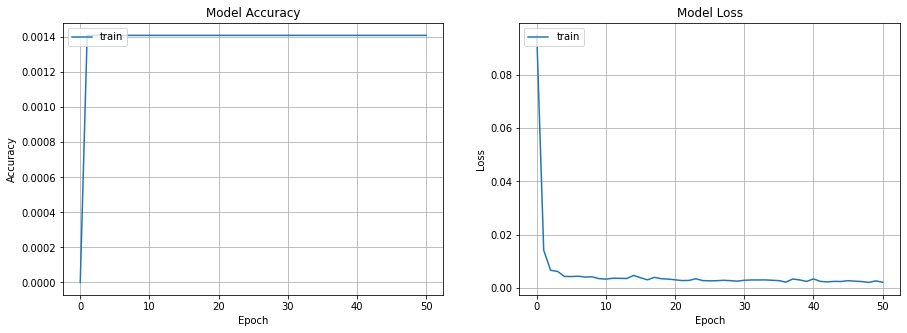

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 

# Summarizing history for accuracy
# Here, accuracy vs epochs is plotted
axs[0].plot(model_history.history['accuracy']) 
axs[0].grid()
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
# axs[0].set_ylim([0.5,1.0])
axs[0].legend(['train'], loc='upper left')

# Summarizing history for loss
# Here, loss vs epochs is plotted
axs[1].plot(model_history.history['loss']) 
axs[1].grid()
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
# axs[1].set_ylim([0.0,2.0])
axs[1].legend(['train'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/CovidTimeSeries.h5')

# ***Prediction through LSTM Model***

In [ ]:
India_cases_fromMarch22 = data_fromMarch22.values.tolist()[0]
India_cases_fromMarch22

[42938599,
 42945160,
 42951556,
 42957477,
 42962953,
 42967315,
 42971308,
 42975883,
 42980067,
 42984261,
 42987875,
 42990991,
 42993494,
 42996062,
 42998938,
 43001477,
 43004005,
 43006080,
 43007841,
 43009390,
 43010971,
 43012749,
 43014687,
 43016372,
 43018032,
 43019453,
 43020723,
 43021982,
 43023215,
 43024440,
 43025775,
 43027035,
 43028131,
 43029044,
 43029839,
 43030925,
 43031958,
 43033067,
 43034217,
 43035271,
 43036132]

In [ ]:
India_cases_fromMarch22 = np.array(India_cases_fromMarch22)
India_cases_fromMarch22.shape

(41,)

In [ ]:
India_cases_fromMarch22 = India_cases_fromMarch22.reshape((India_cases_fromMarch22.shape[0], 1))
India_cases_fromMarch22.shape

(41, 1)

In [ ]:
dataset_total = np.concatenate([India_cases_tillFeb22,India_cases_fromMarch22])
inputs = dataset_total[len(dataset_total) - len(India_cases_fromMarch22) - 60: ]
inputs = inputs.reshape(-1,1)
inputs
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cases = model.predict(X_test)
predicted_cases = scaler.inverse_transform(predicted_cases)
predicted_cases

array([[41229828.],
       [41246008.],
       [41260056.],
       [41272272.],
       [41282940.],
       [41292284.],
       [41300512.],
       [41307788.],
       [41314260.],
       [41320048.],
       [41325256.],
       [41329976.],
       [41334280.],
       [41338236.],
       [41341884.],
       [41345272.],
       [41348416.],
       [41351368.],
       [41354140.],
       [41356740.],
       [41359192.],
       [41361508.],
       [41363680.],
       [41365740.],
       [41367680.],
       [41369524.],
       [41371264.],
       [41372916.],
       [41374484.],
       [41375980.],
       [41377400.],
       [41378752.],
       [41380056.],
       [41381296.],
       [41382480.],
       [41383620.],
       [41384712.],
       [41385764.],
       [41386780.],
       [41387756.],
       [41388700.]], dtype=float32)

In [ ]:
from datetime import date, timedelta

sdate = date(2022,3,1)   # start date
edate = date(2022,4,11)   # end date

date = pd.date_range(sdate,edate-timedelta(days=1),freq='d').strftime("%x")

In [ ]:
result = pd.DataFrame()
result['date'] = date
result['actual'] = India_cases_fromMarch22
result['predicted'] = predicted_cases
result

,date,actual,predicted
0,03/01/22,42938599,41229828.0
1,03/02/22,42945160,41246008.0
2,03/03/22,42951556,41260056.0
3,03/04/22,42957477,41272272.0
4,03/05/22,42962953,41282940.0
5,03/06/22,42967315,41292284.0
6,03/07/22,42971308,41300512.0
7,03/08/22,42975883,41307788.0
8,03/09/22,42980067,41314260.0
9,03/10/22,42984261,41320048.0


<Figure size 5040x2880 with 0 Axes>

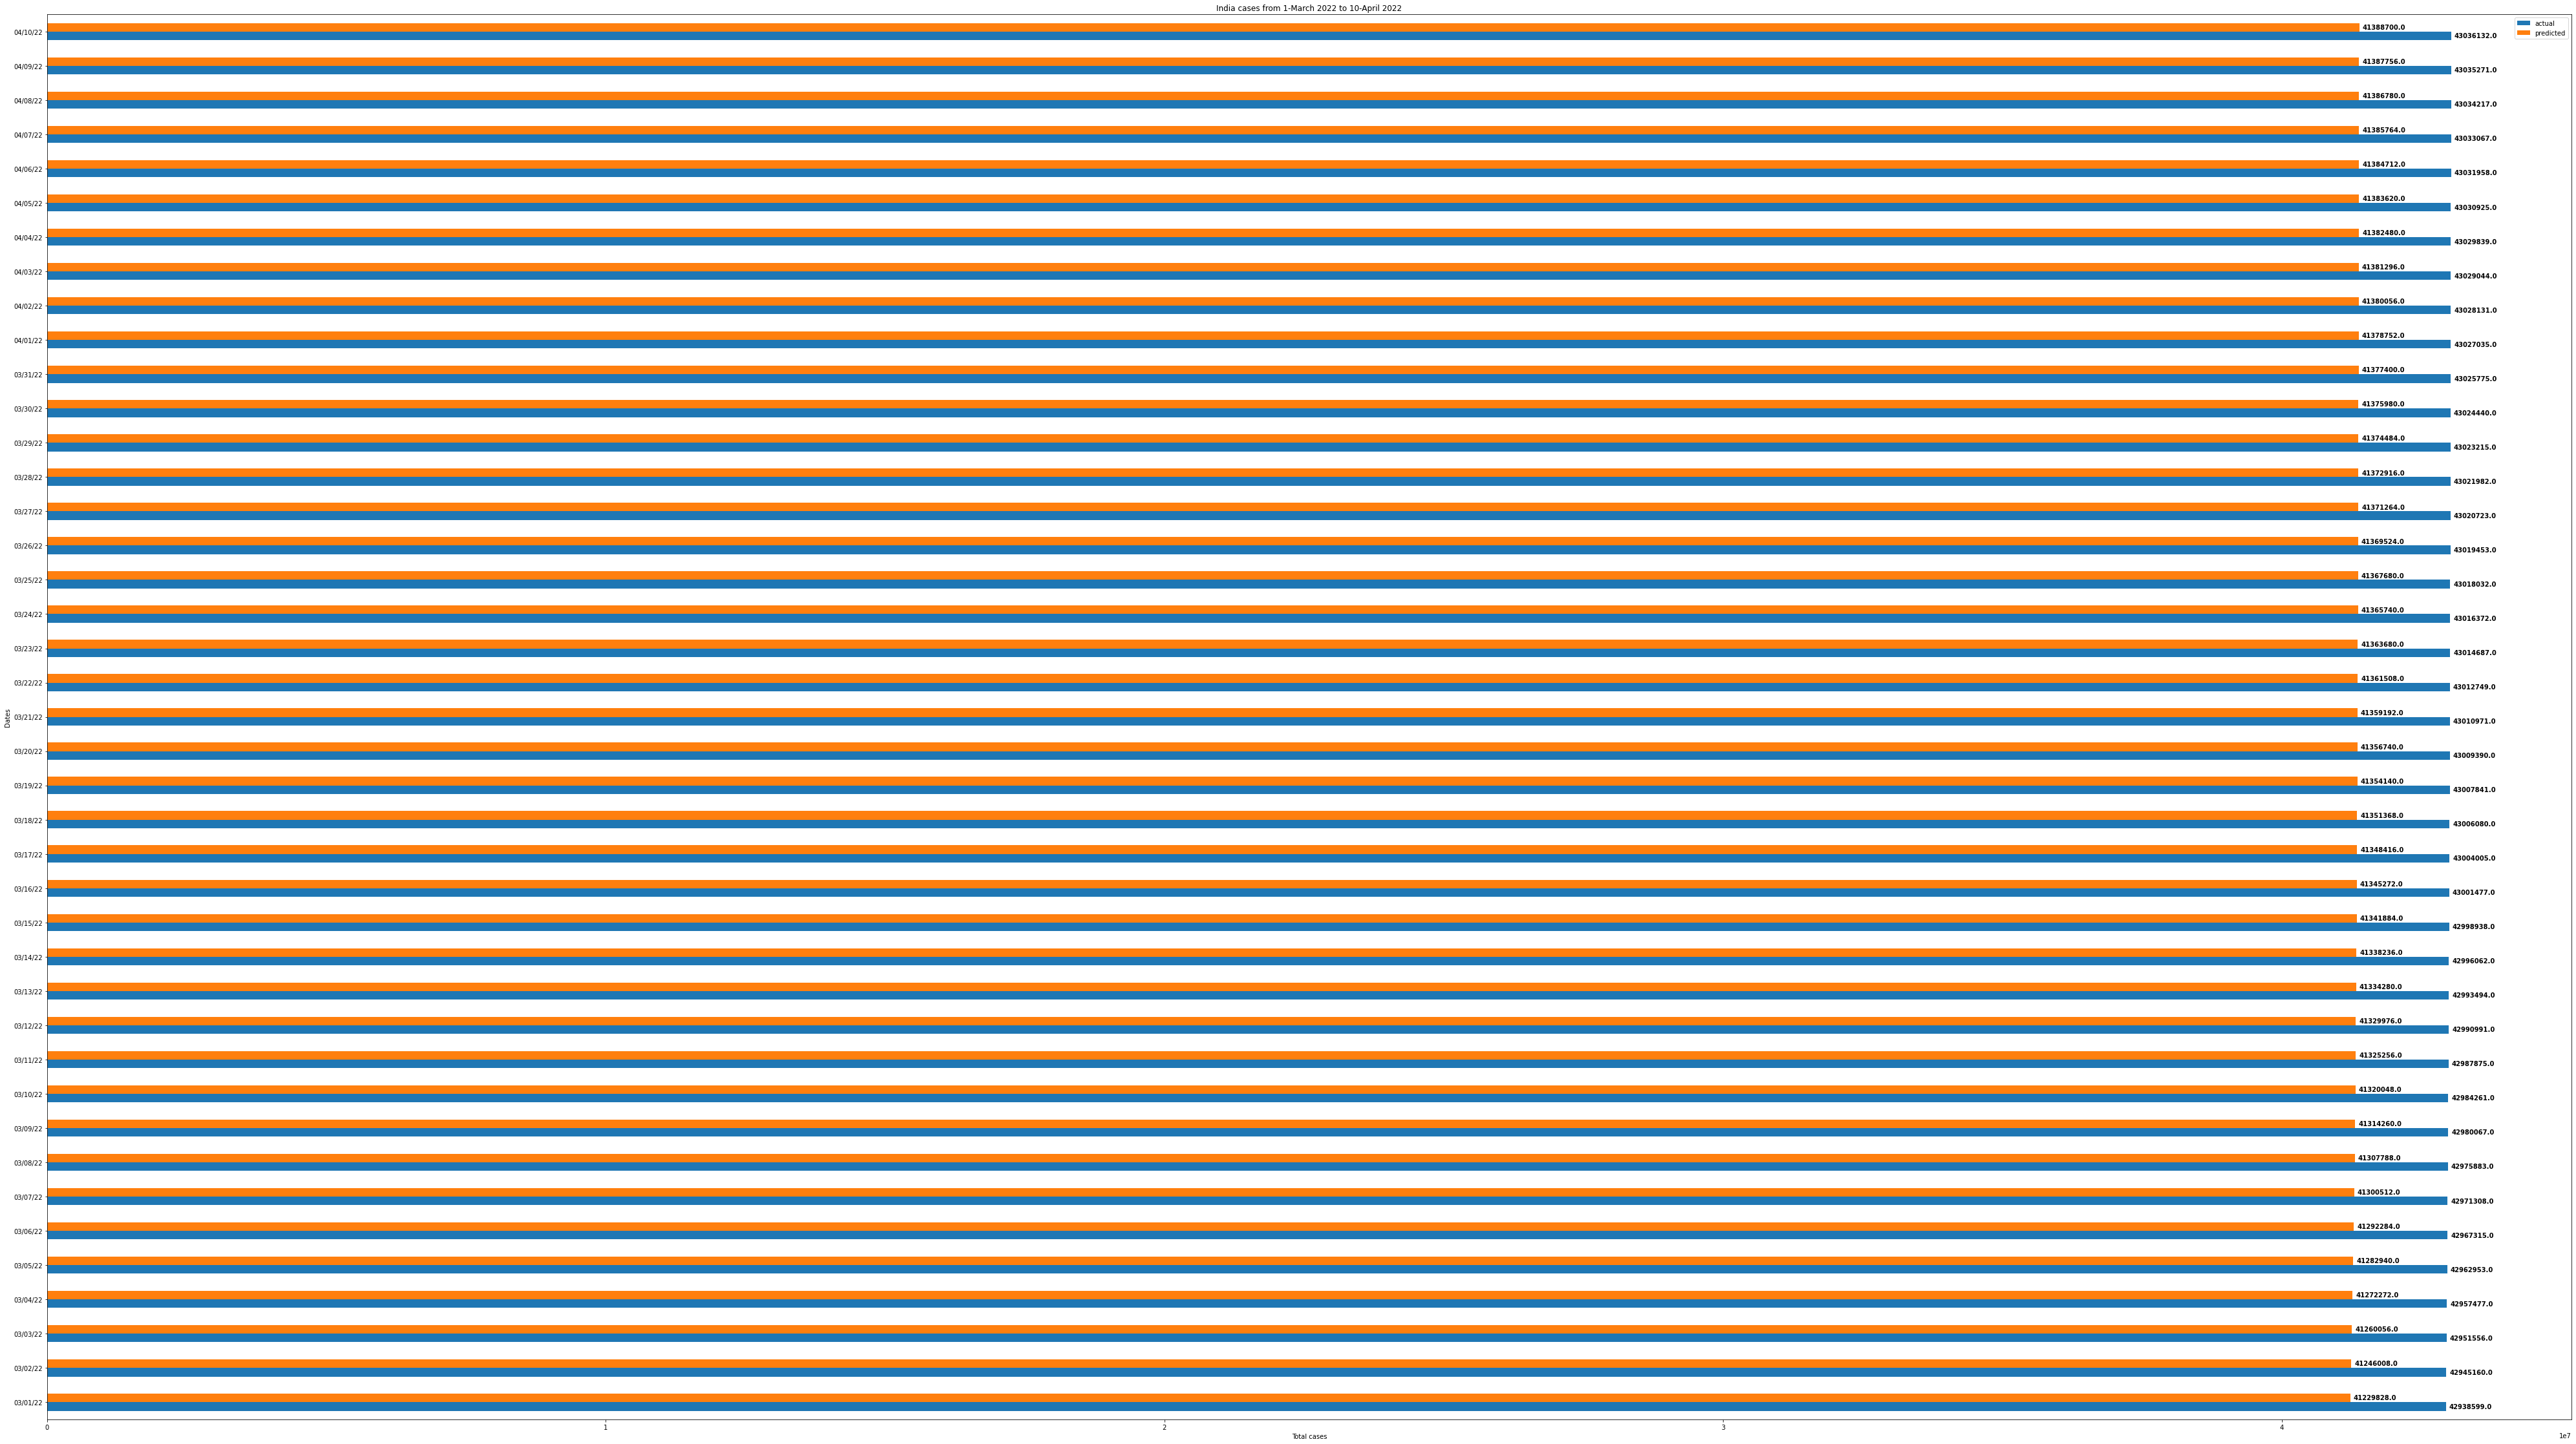

In [ ]:
plt.figure(figsize=(70, 40))
ax = result.plot(kind='barh', x='date', figsize=(70, 40))
ax.set_title('India cases from 1-March 2022 to 10-April 2022')
ax.set_xlabel('Total cases')
ax.set_ylabel('Dates')

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),        
        xytext=(space, 0),        
        textcoords="offset points", 
        va='center',               
        ha=ha,
        color='black', 
        fontweight='bold')                 

In [ ]:
pd.options.plotting.backend = "plotly"
result.plot(x='date', y=['actual', 'predicted'],template='plotly_dark',markers=True)

# ***Importing Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
import plotly.express as px
import plotly.graph_objects as go

# ***Importing Dataset***

In [ ]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_raw = pd.read_csv(url)

In [ ]:
data_raw.head(n=5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/22,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,177974,177974,177974,178141,178257,178295,178352,178373,178387,178418
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274136,274191,274219,274219,274272,274320,274376,274429,274462,274504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265714,265720,265724,265727,265730,265731,265733,265738,265739,265739
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40328,40328,40328,40328,40328,40709,40709,40709,40709,40709
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [ ]:
data_raw.tail(n=5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/22,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656287,656287,656287,656287,656617,656617,656617,656617,656617,656617
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11812,11813,11813,11814,11814,11815,11815,11817,11817,11817
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,317483,317483,317483,317804,317804,318113,318229,318404,318467,318515
283,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,246925,246925,246958,247010,247094,247160,247208,247237,247237,247278


# ***Dataset Pre-Processing***

In [ ]:
del data_raw["Lat"]
del data_raw["Long"]
data_raw["Province/State"] = data_raw["Province/State"].astype(str)
data_raw["Country/Region"] = data_raw["Country/Region"].astype(str)
data_raw.head(n=5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/8/22,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22
0,nan,Afghanistan,0,0,0,0,0,0,0,0,...,177974,177974,177974,178141,178257,178295,178352,178373,178387,178418
1,nan,Albania,0,0,0,0,0,0,0,0,...,274136,274191,274219,274219,274272,274320,274376,274429,274462,274504
2,nan,Algeria,0,0,0,0,0,0,0,0,...,265714,265720,265724,265727,265730,265731,265733,265738,265739,265739
3,nan,Andorra,0,0,0,0,0,0,0,0,...,40328,40328,40328,40328,40328,40709,40709,40709,40709,40709
4,nan,Angola,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [ ]:
for i in range(len(data_raw)):
    if data_raw["Province/State"][i] != 'nan':
        country = data_raw["Country/Region"][i]
        state = data_raw["Province/State"][i]
        data_raw["Country/Region"][i] = country + ", " + state

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
del data_raw["Province/State"]
data_raw

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/8/22,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,177974,177974,177974,178141,178257,178295,178352,178373,178387,178418
1,Albania,0,0,0,0,0,0,0,0,0,...,274136,274191,274219,274219,274272,274320,274376,274429,274462,274504
2,Algeria,0,0,0,0,0,0,0,0,0,...,265714,265720,265724,265727,265730,265731,265733,265738,265739,265739
3,Andorra,0,0,0,0,0,0,0,0,0,...,40328,40328,40328,40328,40328,40709,40709,40709,40709,40709
4,Angola,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,656287,656287,656287,656287,656617,656617,656617,656617,656617,656617
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,Yemen,0,0,0,0,0,0,0,0,0,...,11812,11813,11813,11814,11814,11815,11815,11817,11817,11817
282,Zambia,0,0,0,0,0,0,0,0,0,...,317483,317483,317483,317804,317804,318113,318229,318404,318467,318515


In [ ]:
data_raw.rename(columns = {'Country/Region':'Dates'}, inplace = True)
data_raw.set_index("Dates", inplace = True)
data = data_raw.T
data

Dates,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,"Australia, Australian Capital Territory",...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/13/22,178295,274320,265731,40709,99194,11,7523,9057923,422711,90567,...,894984,238176,5543,521714,10297587,656617,535,11815,318113,247160
4/14/22,178352,274376,265733,40709,99194,11,7535,9059351,422721,90567,...,895240,238176,5543,521880,10320599,656617,535,11815,318229,247208
4/15/22,178373,274429,265738,40709,99194,11,7535,9059944,422729,92330,...,895451,238214,6109,521946,10394533,656617,535,11817,318404,247237
4/16/22,178387,274462,265739,40709,99194,11,7535,9060495,422747,92330,...,895592,238252,6314,522034,10417887,656617,535,11817,318467,247237


In [ ]:
data.insert(loc=0, column='Dates', value=data.index)
data = data.reset_index(drop=True)
data.rename_axis(None, axis=1, inplace=True)
data

,Dates,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,4/13/22,178295,274320,265731,40709,99194,11,7523,9057923,422711,...,894984,238176,5543,521714,10297587,656617,535,11815,318113,247160
813,4/14/22,178352,274376,265733,40709,99194,11,7535,9059351,422721,...,895240,238176,5543,521880,10320599,656617,535,11815,318229,247208
814,4/15/22,178373,274429,265738,40709,99194,11,7535,9059944,422729,...,895451,238214,6109,521946,10394533,656617,535,11817,318404,247237
815,4/16/22,178387,274462,265739,40709,99194,11,7535,9060495,422747,...,895592,238252,6314,522034,10417887,656617,535,11817,318467,247237


# ***Training and Testing Set for Confirmed Cases Prediction of a Specific Country - 'India'***

In [ ]:
india = pd.DataFrame()
india['Dates'] = data['Dates']
india['Confirmed Cases'] = data['India']
india

,Dates,Confirmed Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
812,4/13/22,43039023
813,4/14/22,43039972
814,4/15/22,43040947
815,4/16/22,43042097


In [ ]:
index = india.index[india['Dates'] == '3/1/22'].tolist()

In [ ]:
india_tillFeb22 = india.drop(india.index[index[0]:], axis = 0)
india_tillFeb22

,Dates,Confirmed Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
764,2/24/22,42894345
765,2/25/22,42905844
766,2/26/22,42916117
767,2/27/22,42924130


In [ ]:
india_fromMarch22 = india.drop(india.index[:index[0]], axis = 0)
india_fromMarch22

,Dates,Confirmed Cases
769,3/1/22,42938599
770,3/2/22,42945160
771,3/3/22,42951556
772,3/4/22,42957477
773,3/5/22,42962953
774,3/6/22,42967315
775,3/7/22,42971308
776,3/8/22,42975883
777,3/9/22,42980067
778,3/10/22,42984261


In [ ]:
India_cases_tillFeb22 = india_tillFeb22['Confirmed Cases'].tolist()
India_cases_tillFeb22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [ ]:
India_cases_fromMarch22 = india_fromMarch22['Confirmed Cases'].tolist()
India_cases_fromMarch22

[42938599,
 42945160,
 42951556,
 42957477,
 42962953,
 42967315,
 42971308,
 42975883,
 42980067,
 42984261,
 42987875,
 42990991,
 42993494,
 42996062,
 42998938,
 43001477,
 43004005,
 43006080,
 43007841,
 43009390,
 43010971,
 43012749,
 43014687,
 43016372,
 43018032,
 43019453,
 43020723,
 43021982,
 43023215,
 43024440,
 43025775,
 43027035,
 43028131,
 43029044,
 43029839,
 43030925,
 43031958,
 43033067,
 43034217,
 43035271,
 43036132,
 43036928,
 43038016,
 43039023,
 43039972,
 43040947,
 43042097,
 43044280]

# ***Decomposition of the Confirmed Cases Till Feb'22 in 'India'***

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
india_tillFeb22_indexed = india_tillFeb22.copy()
india_tillFeb22_indexed['Dates'] = pd.to_datetime(india_tillFeb22_indexed['Dates'], format='%m/%d/%y')
india_tillFeb22_indexed.set_index("Dates", inplace = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
india_tillFeb22_indexed

,Confirmed Cases
Dates,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-02-24,42894345
2022-02-25,42905844
2022-02-26,42916117


In [ ]:
india_fromMarch22_indexed = india_fromMarch22.copy()
india_fromMarch22_indexed['Dates'] = pd.to_datetime(india_fromMarch22_indexed['Dates'], format='%m/%d/%y')
india_fromMarch22_indexed.set_index("Dates", inplace = True)

In [ ]:
india_fromMarch22_indexed

,Confirmed Cases
Dates,
2022-03-01,42938599
2022-03-02,42945160
2022-03-03,42951556
2022-03-04,42957477
2022-03-05,42962953
2022-03-06,42967315
2022-03-07,42971308
2022-03-08,42975883
2022-03-09,42980067


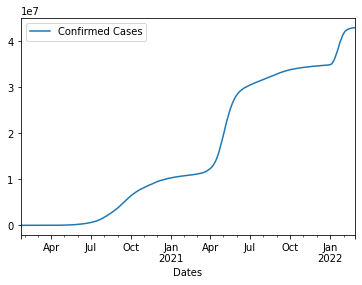

In [ ]:
india_tillFeb22_indexed.plot()

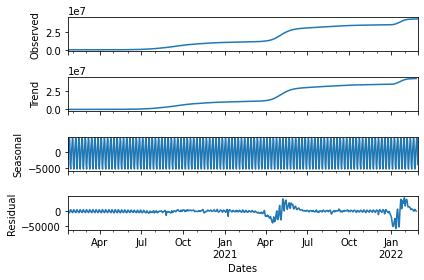

In [ ]:
graph = seasonal_decompose(india_tillFeb22_indexed)
graph.plot()
plt.show()

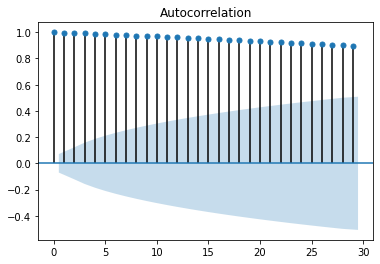

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(india_tillFeb22_indexed)
plt.show()

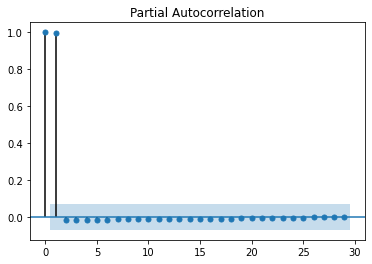

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(india_tillFeb22_indexed)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(india_tillFeb22_indexed['Confirmed Cases'].values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: 0.11388626393290857
ADF p-values: 0.9669964848546668
ADF number of lags used: 17
ADF number of observations: 751
ADF critical values: {'1%': -3.4390874066174355, '5%': -2.8653962034740705, '10%': -2.568823449196012}
ADF best information criterion: 15133.838335827708


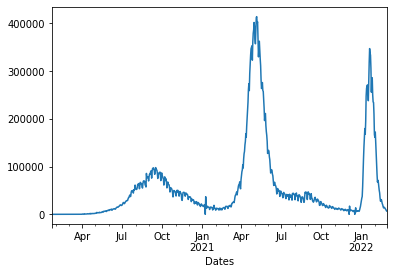

In [ ]:
prev_cases_value = india_tillFeb22_indexed['Confirmed Cases'].shift()
differenced_cases = india_tillFeb22_indexed['Confirmed Cases'] - prev_cases_value
differenced_cases.plot()

In [ ]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_cases.dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -2.655831605380835
ADF p-values: 0.08199809508206102
ADF number of lags used: 20
ADF number of observations: 747
ADF critical values: {'1%': -3.439134355513998, '5%': -2.865416893922985, '10%': -2.56883447171999}
ADF best information criterion: 15103.761774848623


# ***LSTM Model : Pre-Processing***

In [ ]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# India_cases_tillFeb22_scaled = India_cases_tillFeb22_scaled.reshape(-1)
# timeseries_data = India_cases_tillFeb22_scaled.tolist()
timeseries_data = India_cases_tillFeb22
n_steps = 1
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[       0]
 [       0]
 [       0]
 [       0]
 [       0]
 [       0]
 [       0]
 [       0]
 [       1]
 [       1]
 [       1]
 [       2]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       3]
 [       5]
 [       5]
 [      28]
 [      30]
 [      31]
 [      34]
 [      39]
 [      43]
 [      56]
 [      62]
 [      73]
 [      82]
 [     102]
 [     113]
 [     119]
 [     142]
 [     156]
 [     194]
 [     244]
 [     330]
 [     396]
 [     499]
 [     536]
 [     657]
 [     727]
 [     887]
 [     987]
 [    1024]
 [    1251]
 [    1397]
 [    1998]
 [    2543]
 [    2567]
 [    3082]
 [    3588]
 [    4778]
 [    5311]
 [    5916]
 [    6725]
 [    7598]
 [    8446]
 [    9205]
 [   10453]
 [  

(None, None)

In [ ]:
X.shape

(768, 1)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
X.shape

(768, 1, 1)

# ***LSTM Model : Training***

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
LSTM_model.add(LSTM(50, activation='relu'))

LSTM_model.add(Dense(1))

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping                   
from google.colab import drive
drive.mount('/content/drive')

modelCheckpoint = ModelCheckpoint(monitor="loss", 
                      filepath="/content/drive/MyDrive/CovidTimeSeriesLSTM.h5", 
                      verbose=1, 
                      save_best_only=True, 
                      mode='auto') 

callBack = [modelCheckpoint]

Mounted at /content/drive


In [ ]:
LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.fit(X, y, epochs=300, verbose=1, callbacks = callBack)

Epoch 1/300
19/24 [======================>.......] - ETA: 0s - loss: 466521394511872.0000 
Epoch 1: loss improved from inf to 453438722801664.00000, saving model to /content/drive/MyDrive/CovidTimeSeriesLSTM.h5
24/24 [==============================] - 2s 5ms/step - loss: 453438722801664.0000
Epoch 2/300
20/24 [========================>.....] - ETA: 0s - loss: 334355553583104.0000
Epoch 2: loss improved from 453438722801664.00000 to 309696502169600.00000, saving model to /content/drive/MyDrive/CovidTimeSeriesLSTM.h5
24/24 [==============================] - 0s 5ms/step - loss: 309696502169600.0000
Epoch 3/300
21/24 [=========================>....] - ETA: 0s - loss: 51375484436480.0000 
Epoch 3: loss improved from 309696502169600.00000 to 45161551757312.00000, saving model to /content/drive/MyDrive/CovidTimeSeriesLSTM.h5
24/24 [==============================] - 0s 5ms/step - loss: 45161551757312.0000
Epoch 4/300
20/24 [========================>.....] - ETA: 0s - loss: 3477189427200.0000
E

In [ ]:
LSTM_model = tf.keras.models.load_model('/content/drive/MyDrive/CovidTimeSeriesLSTM.h5')

# ***LSTM Model : Predicting Till Current Date***

In [ ]:
India_cases = india['Confirmed Cases'].tolist()
index = india.index[india['Dates'] == '3/1/22'].tolist()
count = n_steps
index = index[0] - count
new_list = India_cases[index:index+count]
new_list

[42931045]

In [ ]:
x_input = np.array(new_list)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<48):
    
    if(len(temp_input)>n_steps):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = LSTM_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(India_cases[index+count])
        count = count + 1
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = LSTM_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(India_cases[index+count])
        count = count + 1
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[42987596.]
1 day input [42938599]
1 day output [[42995168.]]
2 day input [42945160]
2 day output [[43001732.]]
3 day input [42951556]
3 day output [[43008132.]]
4 day input [42957477]
4 day output [[43014072.]]
5 day input [42962953]
5 day output [[43019548.]]
6 day input [42967315]
6 day output [[43023920.]]
7 day input [42971308]
7 day output [[43027916.]]
8 day input [42975883]
8 day output [[43032496.]]
9 day input [42980067]
9 day output [[43036688.]]
10 day input [42984261]
10 day output [[43040888.]]
11 day input [42987875]
11 day output [[43044508.]]
12 day input [42990991]
12 day output [[43047624.]]
13 day input [42993494]
13 day output [[43050136.]]
14 day input [42996062]
14 day output [[43052704.]]
15 day input [42998938]
15 day output [[43055580.]]
16 day input [43001477]
16 day output [[43058124.]]
17 day input [43004005]
17 day output [[43060656.]]
18 day input [43006080]
18 day output [[43062736.]]
19 day input [43007841]
19 day output [[43064500.]]
20 day input [4300

In [ ]:
from datetime import date, timedelta

sdate = date(2022,3,1)   
edate = date.today()     

date = pd.date_range(sdate,edate-timedelta(days=1),freq='d').strftime("%x")

In [ ]:
result = pd.DataFrame()
result['date'] = date
result['actual'] = India_cases_fromMarch22

In [ ]:
result['predicted'] = lst_output

In [ ]:
result['difference'] = result['predicted'] - result['actual']

In [ ]:
result['relation'] = result['actual'] / result['predicted']

In [ ]:
result

,date,actual,predicted,difference,relation
0,03/01/22,42938599,42987596.0,48997.0,0.998860
1,03/02/22,42945160,42995168.0,50008.0,0.998837
2,03/03/22,42951556,43001732.0,50176.0,0.998833
3,03/04/22,42957477,43008132.0,50655.0,0.998822
4,03/05/22,42962953,43014072.0,51119.0,0.998812
5,03/06/22,42967315,43019548.0,52233.0,0.998786
6,03/07/22,42971308,43023920.0,52612.0,0.998777
7,03/08/22,42975883,43027916.0,52033.0,0.998791
8,03/09/22,42980067,43032496.0,52429.0,0.998782
9,03/10/22,42984261,43036688.0,52427.0,0.998782


# ***LSTM Model : Evaluating Predictions Till Current Date***

<Figure size 5040x2880 with 0 Axes>

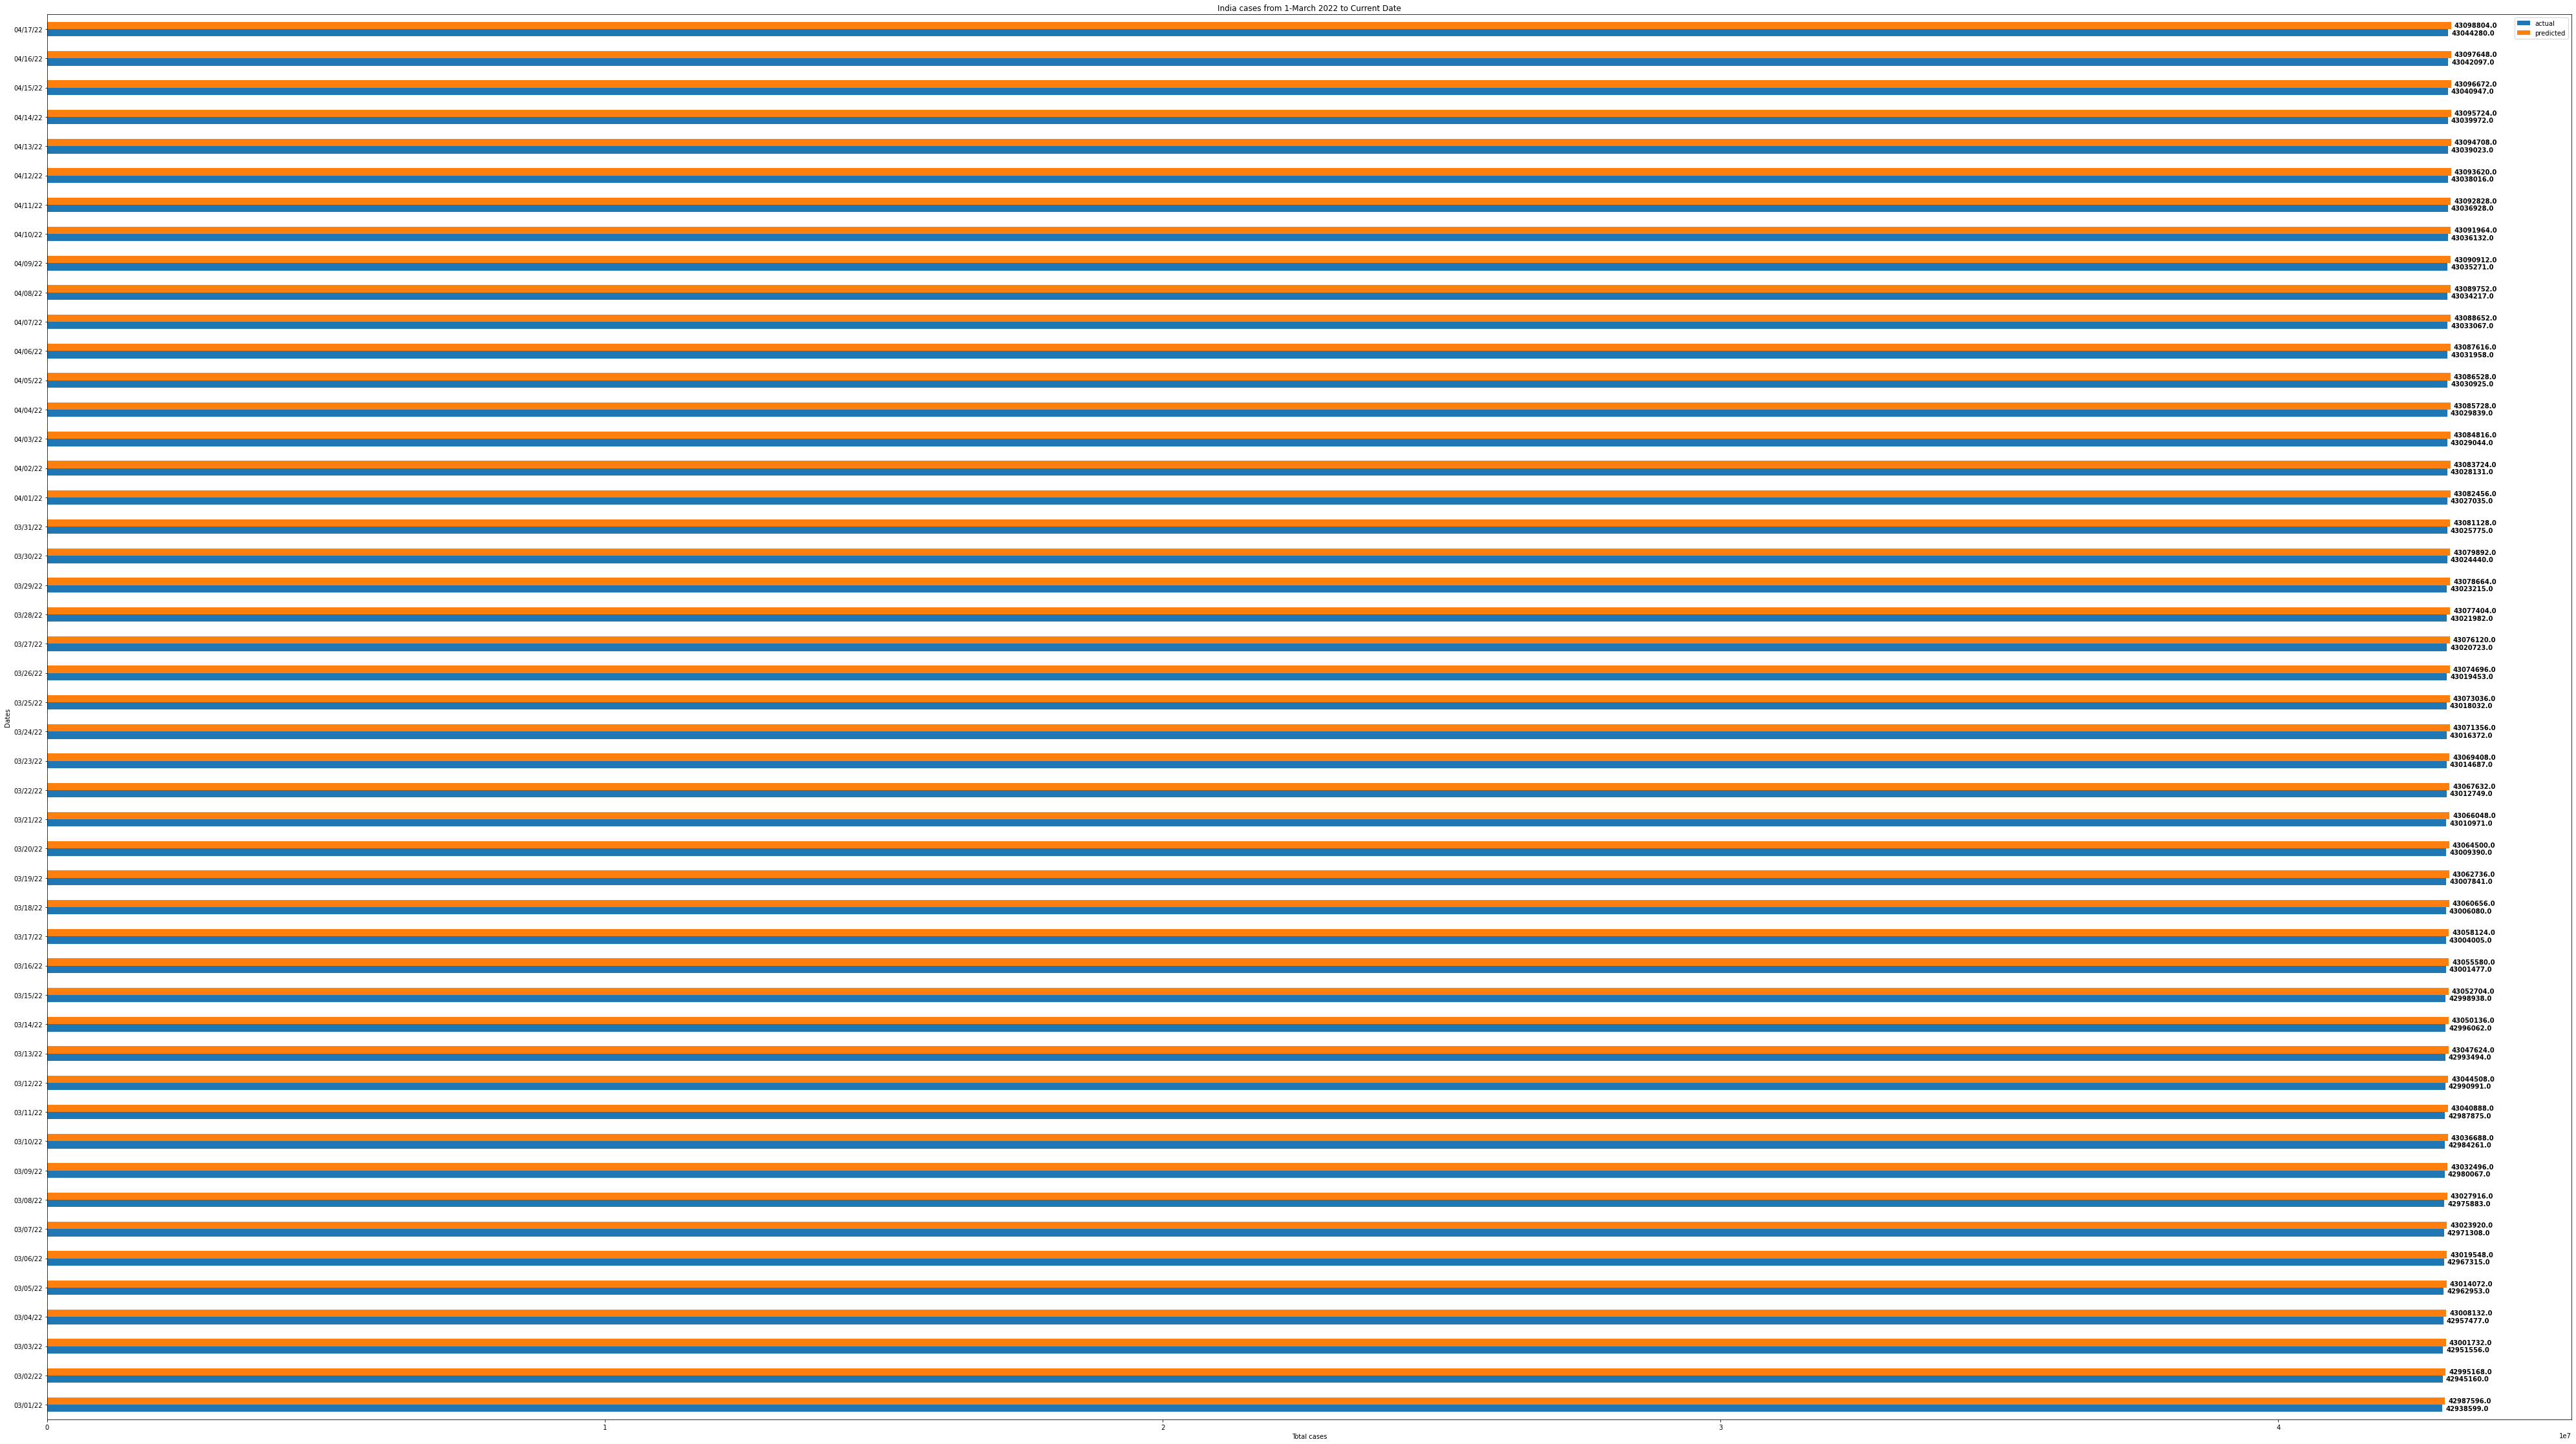

In [ ]:
pd.options.plotting.backend = "matplotlib"
plt.figure(figsize=(70, 40))
ax = result.plot(kind='barh', x='date', y=['actual', 'predicted'], figsize=(70, 40))
ax.set_title('India cases from 1-March 2022 to Current Date')
ax.set_xlabel('Total cases')
ax.set_ylabel('Dates')

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),        
        xytext=(space, 0),        
        textcoords="offset points", 
        va='center',               
        ha=ha,
        color='black', 
        fontweight='bold')     

In [ ]:
pd.options.plotting.backend = "plotly"
result.plot(x='date', y=['actual', 'predicted'],template='plotly_dark',markers=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, max_error
import math
print("Mean Square Error (MSE): {:.2f}".format(mean_squared_error(result['actual'], result['predicted'])))                                                      # Lower is Good
print("Root Mean Square Error (RMSE): {:.2f}".format(math.sqrt(mean_squared_error(result['actual'], result['predicted']))))                                     # Lower is Good, 0 is best, RMSE >= MAE
print("Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(result['actual'], result['predicted'])))                                                   # Lower is Good, 0 is best
print("Explained Variance: {:.2f}".format(explained_variance_score(result['actual'], result['predicted'])))                                                     # Higher is Good, 1.0 is best
print("Max Error: {:.2f}".format(max_error(result['actual'], result['predicted'])))                                                                             # Lower is Good, 0 is best, Highest Difference b/w actual & predicted

R2 Score (r2_score): -2.7751 ~ -277.51%
Mean Square Error (MSE): 2951261050.94
Root Mean Square Error (RMSE): 54325.51
Mean Absolute Error (MAE): 54296.81
Explained Variance: 1.00
Max Error: 55900.00


In [ ]:
result['relation'].describe()

count    48.000000
mean      0.998739
std       0.000041
min       0.998703
25%       0.998710
50%       0.998722
75%       0.998753
max       0.998860
Name: relation, dtype: float64

# ***LSTM Model : Future Forecasting of 2 months from Current Date***

In [ ]:
count = - n_steps
new_list = India_cases[count:]
new_list

[43044280]

In [ ]:
x_input = np.array(new_list)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<60):
    
    if(len(temp_input)>n_steps):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = LSTM_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = LSTM_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print(lst_output)

[43100984.]
1 day input [43100984.]
1 day output [[43157756.]]
2 day input [43157756.]
2 day output [[43214608.]]
3 day input [43214608.]
3 day output [[43271532.]]
4 day input [43271532.]
4 day output [[43328536.]]
5 day input [43328536.]
5 day output [[43385620.]]
6 day input [43385620.]
6 day output [[43442776.]]
7 day input [43442776.]
7 day output [[43500008.]]
8 day input [43500008.]
8 day output [[43557316.]]
9 day input [43557316.]
9 day output [[43614700.]]
10 day input [43614700.]
10 day output [[43672156.]]
11 day input [43672156.]
11 day output [[43729680.]]
12 day input [43729680.]
12 day output [[43787288.]]
13 day input [43787288.]
13 day output [[43844972.]]
14 day input [43844972.]
14 day output [[43902736.]]
15 day input [43902736.]
15 day output [[43960568.]]
16 day input [43960568.]
16 day output [[44018476.]]
17 day input [44018476.]
17 day output [[44076456.]]
18 day input [44076456.]
18 day output [[44134520.]]
19 day input [44134520.]
19 day output [[44192660.]]

In [ ]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

sdate = date.today()
edate = date.today() + relativedelta(months=+2)

date = pd.date_range(sdate,edate-timedelta(days=2),freq='d').strftime("%x")

In [ ]:
futureforecast = pd.DataFrame()
futureforecast['date'] = date
futureforecast['predicted_cases'] = lst_output

In [ ]:
futureforecast

,date,predicted_cases
0,04/18/22,43100984.0
1,04/19/22,43157756.0
2,04/20/22,43214608.0
3,04/21/22,43271532.0
4,04/22/22,43328536.0
5,04/23/22,43385620.0
6,04/24/22,43442776.0
7,04/25/22,43500008.0
8,04/26/22,43557316.0
9,04/27/22,43614700.0


<Figure size 5040x2880 with 0 Axes>

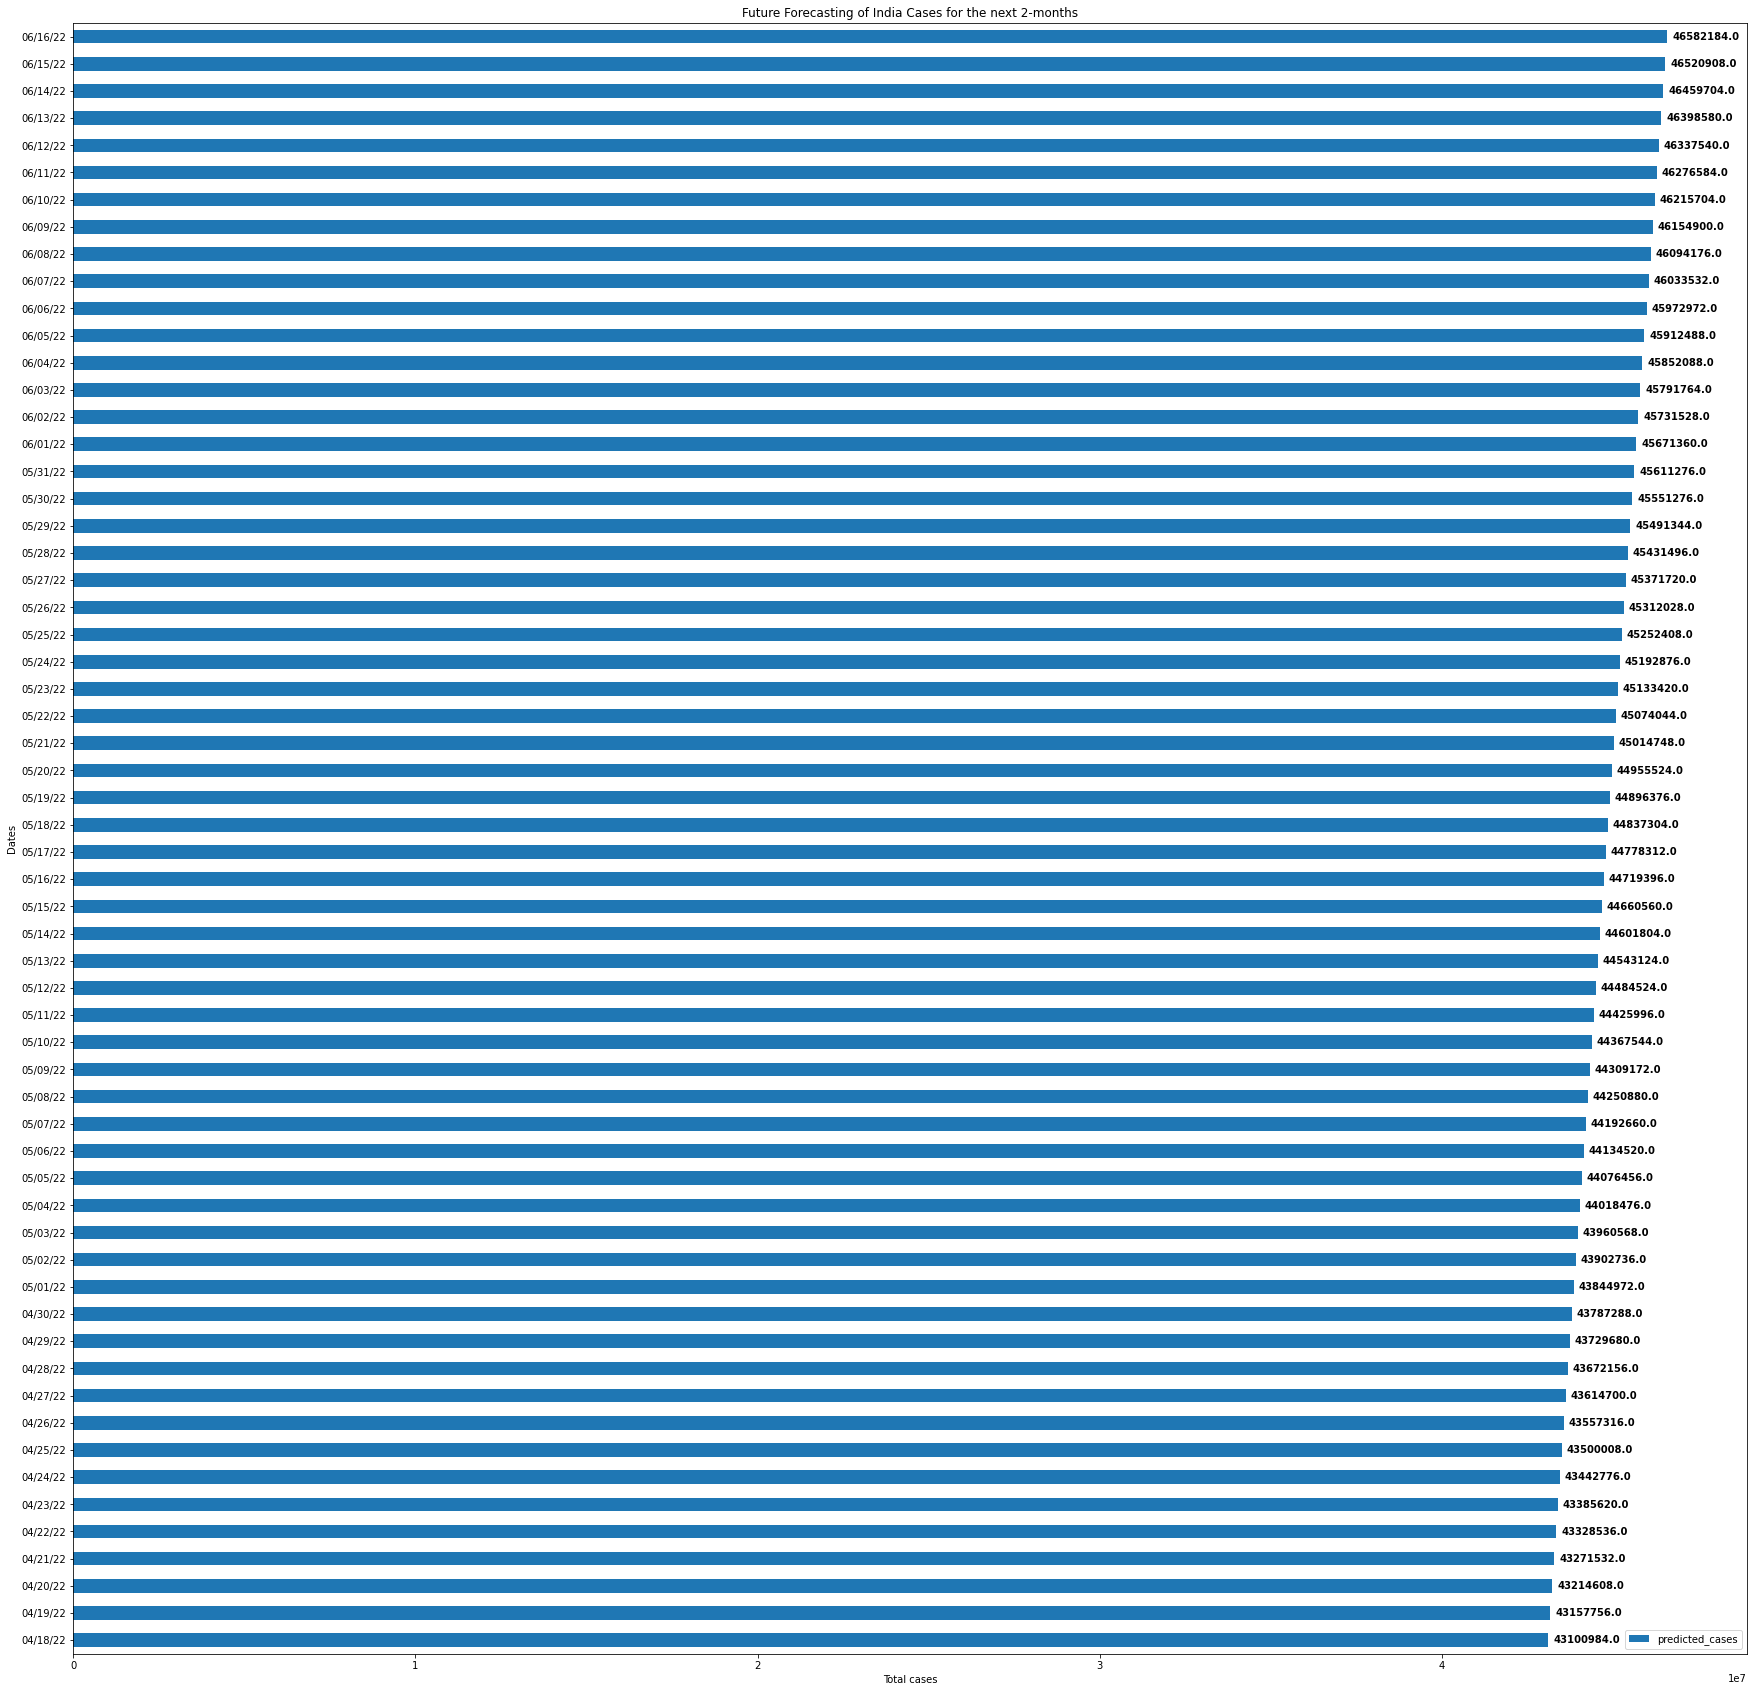

In [ ]:
pd.options.plotting.backend = "matplotlib"
plt.figure(figsize=(70, 40))
ax = futureforecast.plot(kind='barh', x='date', y='predicted_cases', figsize=(30, 30))
ax.set_title('Future Forecasting of India Cases for the next 2-months')
ax.set_xlabel('Total cases')
ax.set_ylabel('Dates')

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),        
        xytext=(space, 0),        
        textcoords="offset points", 
        va='center',               
        ha=ha,
        color='black', 
        fontweight='bold')     

In [ ]:
pd.options.plotting.backend = "plotly"
futureforecast.plot(x='date', y='predicted_cases', template='plotly_dark',markers=True)